In [262]:
### Created by Srinath Venkatraman ###


# This cell imports libraries that will be used later
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

#  Simulation of Random Variables

*Simulating future index level in Black-Scholes-Merton setup*

$$S_{T}=S_{0}\exp((r-\frac{1}{2}\sigma^{2})T+\sigma\sqrt{T}z)$$

The	variables and parameters have the following	meaning:

$S_{T}$: Index levelat date	T

$r$: Constant riskless short rate

$σ$: Constant volatility (= standard deviation of returns) of S

$z$: Standard normally distributed random variable


In [263]:
S0 = 100  # initial value
r = 0.05  # constant short rate
sigma = 0.25  # constant volatility
T = 2.0  # in years
I = 10000  # number of random draws
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
             + sigma * np.sqrt(T) * npr.standard_normal(I))

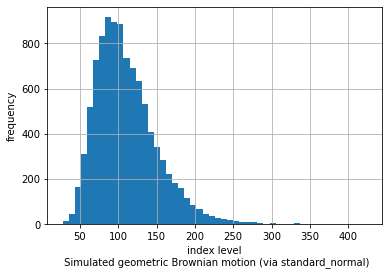

In [264]:
plt.hist(ST1, bins=50)
plt.xlabel('index level\n Simulated geometric Brownian motion (via standard_normal)')
plt.ylabel('frequency')
plt.grid(True)

In [265]:
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
                        sigma * np.sqrt(T), size=I)

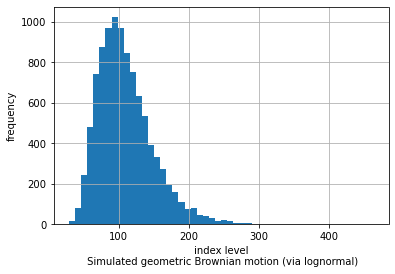

In [266]:
plt.hist(ST2, bins=50)
plt.xlabel('index level\n Simulated geometric Brownian motion (via lognormal)')
plt.ylabel('frequency')
plt.grid(True);

In [267]:
import scipy.stats as scs

In [268]:
#The function in this cell is intended to compare the distributional characteristics of simulation results
def print_statistics(a1, a2):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    a1, a2 : ndarray objects
        results object from simulation
    '''
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print ("%14s %14s %14s" % ('statistic', 'data set 1', 'data set 2'))
    print (45 * "-")
    print ("%14s %14.3f %14.3f" % ('size', sta1[0], sta2[0]))
    print ("%14s %14.3f %14.3f" % ('min', sta1[1][0], sta2[1][0]))
    print ("%14s %14.3f %14.3f" % ('max', sta1[1][1], sta2[1][1]))
    print ("%14s %14.3f %14.3f" % ('mean', sta1[2], sta2[2]))
    print ("%14s %14.3f %14.3f" % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print ("%14s %14.3f %14.3f" % ('skew', sta1[4], sta2[4]))
    print ("%14s %14.3f %14.3f" % ('kurtosis', sta1[5], sta2[5]))

In [269]:
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.422         28.830
           max        424.163        463.649
          mean        110.965        110.086
           std         40.754         39.990
          skew          1.190          1.195
      kurtosis          2.716          2.969


## Simulation of Geometric Brownian Motion

A stochastic process is a sequence of repeated simulations of a random variable.

Consider the Black-Scholes-Merton model in its dynamic form. $Z_{t}$ is a standard Brownian motion. The SDE is called a geometric Brownian motion.

*Stochastic differential equation in Black-Scholes-Merton setup*

$$dS_{t}=rS_{t}dt+S_{t}dZ_{t}$$

*Simulating index levels dynamically in Black-Scholes-Merton setup*

$$S_{t}=S_{t-\Delta t}\exp((r-\frac{1}{2}\sigma^{2})\Delta t+\sigma\sqrt{\Delta t}z$$

In [270]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M + 1, I))
S[0] = S0
for t in range(1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
            + sigma * np.sqrt(dt) * npr.standard_normal(I))

Text(0.5, 1.0, 'Simulated geometric Brownian motion at maturity')

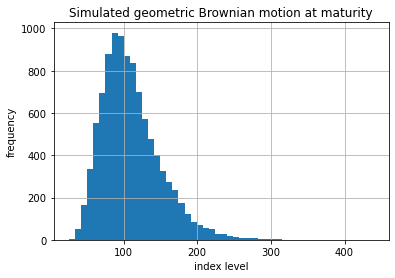

In [271]:
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)
plt.title('Simulated geometric Brownian motion at maturity')

In [272]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         25.792         28.830
           max        438.934        463.649
          mean        110.466        110.086
           std         40.242         39.990
          skew          1.164          1.195
      kurtosis          2.695          2.969


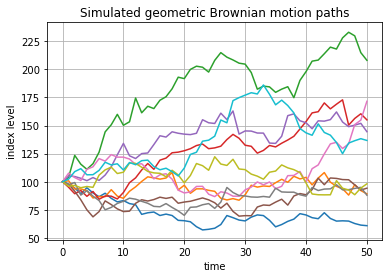

In [273]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)
plt.title('Simulated geometric Brownian motion paths');

### Simulation of Square-root Diffusion
Another important class of financial processes is mean-reverting processes, which are used to model short rates or volatility processes, for example. A popular and widely used model is the square-root diffusion, as proposed by Cox, Ingersoll, and Ross (1985).

*Stochastic differential equation for square-root diffusion*

$$dx_{t}=\kappa(\theta-x_{t})dt+\sigma\sqrt{x_{t}}dZ_{t}$$

The variables and parameters have the following meaning:

$x_{t}$: Process level at date t,
$\kappa$:  Mean-reversion factor,
$\theta$:  Long-term mean of the process,
$\sigma$:  Constant volatility parameter,
$Z$:  Standard Brownian motion.

It	is	well	known	that	the	values	of	xt	are	chi-squared	distributed.	However,	as	stated
before,	many	financial	models	can	be	discretized	and	approximated	by	using	the	normal
distribution	(i.e.,	a	so-called	Euler	discretization	scheme).	While	the	Euler	scheme	is	exactfor	the	geometric	Brownian	motion,	it	is	biased	for	the	majority	of	other	stochastic
processes.	Even	if	there	is	an	exact	scheme	available	—	one	for	the	square-root	diffusion
will	be	presented	shortly	—	the	use	of	an	Euler	scheme	might	be	desirable	due	to
numerical	and/or	computational	reasons.	Defining	s	≡	t	–	Δt	and	x+	≡	max(x,0),
The following Equation presents	such	an	Euler	scheme.	This	particular	one	is	generally	called	full
truncation	in	the	literature	(cf.	Hilpisch	(2015)).

*Euler discretization for square-root diffusion*

$$\tilde{x_{t}}=\tilde{x_{s}}+\kappa(\theta-\tilde{x_{s}}^+)\Delta t+\sigma\sqrt{\tilde{x_{s}}^+}\sqrt{\Delta t}z_{t}$$

$$x_{t}=\tilde{x_{s}}^+$$

In [274]:
x0 = 0.05
kappa = 3.0
theta = 0.02
sigma = 0.1

In [275]:
I = 10000
M = 50
dt = T / M
def srd_euler():
    xh = np.zeros((M + 1, I))
    x1 = np.zeros_like(xh)
    xh[0] = x0
    x1[0] = x0
    for t in range(1, M + 1):
        xh[t] = (xh[t - 1]
              + kappa * (theta - np.maximum(xh[t - 1], 0)) * dt
              + sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * np.sqrt(dt)  
              * npr.standard_normal(I))
    x1 = np.maximum(xh, 0)
    return x1
x1 = srd_euler()

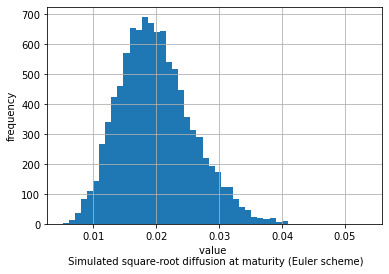

In [276]:
plt.hist(x1[-1], bins=50)
plt.xlabel('value \n Simulated square-root diffusion at maturity (Euler scheme)')
plt.ylabel('frequency')
plt.grid(True)

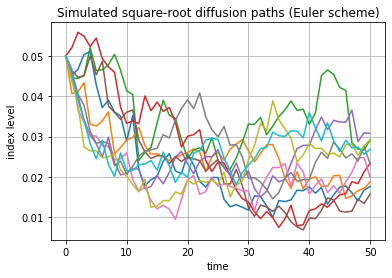

In [277]:
plt.plot(x1[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')
plt.title('Simulated square-root diffusion paths (Euler scheme)')
plt.grid(True)

### Simulation of Stochastic volatility
One	of	the	major	simplifying	assumptions	of	the	Black-Scholes-Merton	model	is	the
constant	volatility.	However,	volatility	in	general	is	neither	constant	nor	deterministic;	it	is
stochastic.	Therefore,	a	major	advancement	with	regard	to	financial	modeling	was
achieved	in	the	early	1990s	with	the	introduction	of	so-called	stochastic	volatility	models.
One	of	the	most	popular	models	that	fall	into	that	category	is	that	of	Heston	(1993),	which
is	presented	below.

*Stochastic differential equations for Heston stochastic volatility model*

$$dS_{t}=rS_{t}dt+\sqrt{v_{t}}S_{t}dZ_{t}^{1}$$

$$dv_{t}=\kappa_{v}(\theta_{v}-v_{t})dt+\sigma_{v}\sqrt{v_{t}}dZ_{t}^{2}$$

$$dZ_{t}^{1}dZ_{t}^{2}=\rho$$

In [278]:
S0 = 100.
r = 0.05
v0 = 0.1
kappa = 3.0
theta = 0.25
sigma = 0.1
rho = 0.6
T = 1.0

In [279]:
corr_mat = np.zeros((2, 2))
corr_mat[0, :] = [1.0, rho]
corr_mat[1, :] = [rho, 1.0]
cho_mat = np.linalg.cholesky(corr_mat)

In [280]:
cho_mat

array([[1. , 0. ],
       [0.6, 0.8]])

In [281]:
M = 50
I = 10000
ran_num = npr.standard_normal((2, M + 1, I))

In [282]:
dt = T / M
v = np.zeros_like(ran_num[0])
vh = np.zeros_like(v)
v[0] = v0
vh[0] = v0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    vh[t] = (vh[t - 1] + kappa * (theta - np.maximum(vh[t - 1], 0)) * dt
          + sigma * np.sqrt(np.maximum(vh[t - 1], 0)) * np.sqrt(dt)  
          * ran[1])
v = np.maximum(vh, 0)

In [283]:
S = np.zeros_like(ran_num[0])
S[0] = S0
for t in range(1, M + 1):
    ran = np.dot(cho_mat, ran_num[:, t, :])
    S[t] = S[t - 1] * np.exp((r - 0.5 * v[t]) * dt +
                    np.sqrt(v[t]) * ran[0] * np.sqrt(dt))

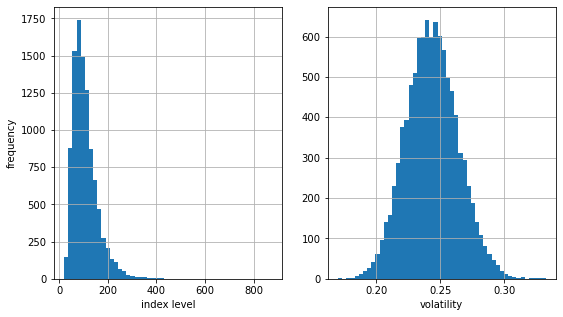

In [284]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
ax1.hist(S[-1], bins=50)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.grid(True)
ax2.hist(v[-1], bins=50)
ax2.set_xlabel('volatility')
ax2.grid(True)

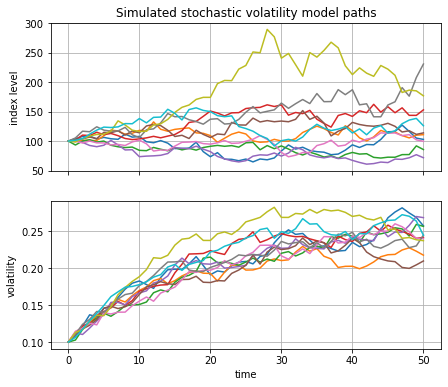

In [285]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 6))
ax1.plot(S[:, :10], lw=1.5)
ax1.set_ylabel('index level')
ax1.set_title('Simulated stochastic volatility model paths')
ax1.grid(True)
ax2.plot(v[:, :10], lw=1.5)
ax2.set_xlabel('time')
ax2.set_ylabel('volatility')
ax2.grid(True)

In [286]:
print_statistics(S[-1], v[-1])

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         20.543          0.170
           max        873.425          0.332
          mean        107.484          0.244
           std         52.649          0.020
          skew          2.014          0.141
      kurtosis         10.428          0.029


### Simulation of Jump-Diffusion
Stochastic	volatility	and	the	leverage	effect	are	stylized	(empirical)	facts	found	in	a
number	of	markets.	Another	important	stylized	empirical	fact	is	the	existence	of	jumps	in
asset	prices	and,	for	example,	volatility.	In	1976,	Merton	published	his	jump	diffusion
model,	enhancing	the	Black-Scholes-Merton	setup	by	a	model	component	generating
jumps	with	log-normal	distribution.	The	risk-neutral	SDE	is	presented	in	Equation	below.

*Stochastic differential equation for Merton jump diffusion model*

$$dS_{t}=(r-r_{J})S_{t}dt+S_{t}dZ_{t}+J_{t}S_{t}dN_{t}$$

For completeness, here is an overview of the variables’ and parameters’ meaning:

$S_{t}$: Index level at date t,
$r$:  Constant riskless short rate

$r_{J}\equiv\lambda\cdot(e^{\mu_{J}+\delta^{2}/2}-1)$: Drift correction for jump to maintain risk neutrality

$\sigma$: Constant volatility of S,
$dZ_{t}$:  Standard Brownian motion,
$J_{t}$:  Jump at date t with distribution …

$\bullet …log(1+J_{t})\approx N(log(1+\mu_{J}-\frac{\delta^{2}}{2},\delta^{2})$ with

$N$ as the cumulative distribution function of a standard normal random variable

$N_{t}$: Poisson process with intensity

Below Equation presents an Euler discretization for the jump diffusion where the $z_{t}^{n}$ are standard normally distributed and the $y_{t}$  are Poisson distributed with intensity.

*Euler discretization for Merton jump diffusion model*

$$S_{t}=S_{t-\Delta t}(e^{(r-r_{J}-\sigma^{2}/2)\Delta t+\sigma\sqrt{\Delta t}z_{t}^{1}}+(e^{\mu_{J}+\delta z_{t}^{2}}-1)y_{t})$$

In [287]:
S0 = 100.
r = 0.05
sigma = 0.2
lamb = 0.75
mu = -0.6
delta = 0.25
T = 1.0

In [288]:
M = 50
I = 10000
dt = T / M
rj = lamb * (np.exp(mu + 0.5 * delta ** 2) - 1)
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I))
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I))
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt
                       + sigma * np.sqrt(dt) * sn1[t])
                       + (np.exp(mu + delta * sn2[t]) - 1)
                       * poi[t])
    S[t] = np.maximum(S[t], 0)

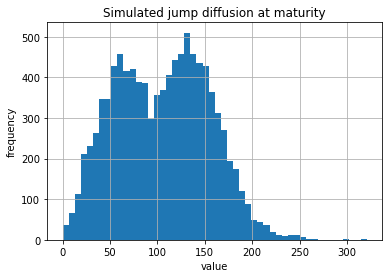

In [289]:
plt.hist(S[-1], bins=50)
plt.title('Simulated jump diffusion at maturity')
plt.xlabel('value')
plt.ylabel('frequency')
plt.grid(True)

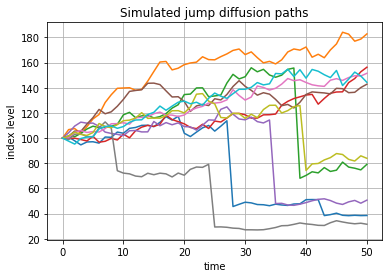

In [290]:
plt.plot(S[:, :10], lw=1.5)
plt.title('Simulated jump diffusion paths')
plt.xlabel('time')
plt.ylabel('index level')
plt.grid(True)

# Valuation of European Options


The	payoff	of	a	European	call	option	on	an	index	at	maturity	is	given	by	h(ST)	≡	max(ST	–
K,0),	where	ST	is	the	index	level	at	maturity	date	T	and	K	is	the	strike	price.	Given	a,	or	in
complete	markets	the,	risk-neutral	measure	for	the	relevant	stochastic	process	(e.g.,
geometric	Brownian	motion),	the	price	of	such	an	option	is	given	by	the	formula	in
Equation	below.

*Pricing by risk-neutral expectation*

$$C_{0}=e^{rT}E_{0}^Q(h(S_{T}))e^{rT}\int_{0}^{\infty}h(s)q(s)ds$$

Below Equation	provides	the	respective	Monte	Carlo	estimator	for	the	European	option, where	 	is	the	ith	simulated	index	level	at	maturity.

*Risk-neutral Monte Carlo estimator*

$$\widetilde{C_{0}}=e^{rT}\frac{1}{I}\sum_{i=1}^{I} h(\tilde{S}^{i}_{T})$$

In [291]:
S0 = 100.
r = 0.05
sigma = 0.25
T = 1.0
I = 50000
def gbm_mcs_stat(K):
    ''' Valuation of European call option in Black-Scholes-Merton
    by Monte Carlo simulation (of index level at maturity)
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    sn = gen_sn(1, I)
    # simulate index level at maturity
    ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T 
                 + sigma * np.sqrt(T) * sn[1])
    # calculate payoff at maturity
    hT = np.maximum(ST - K, 0)
    # calculate MCS estimator
    C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
    return C0

In [292]:
gbm_mcs_stat(K=105.)

10.043673368854034

In [293]:
#The following function considers the dynamic simulation approach and 
#allow for European put options in addition to the call option.
M = 50
def gbm_mcs_dyna(K, option='call'):
    ''' Valuation of European options in Black-Scholes-Merton
    by Monte Carlo simulation (of index level paths)
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    dt = T / M
    # simulation of index level paths
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * np.sqrt(dt) * sn[t])
    # case-based calculation of payoff
    if option == 'call':
        hT = np.maximum(S[-1] - K, 0)
    else:
        hT = np.maximum(K - S[-1], 0)
    # calculation of MCS estimator
    C0 = np.exp(-r * T) * 1 / I * np.sum(hT)
    return C0

In [294]:
gbm_mcs_dyna(K=110., option='call')

7.923069923403122

In [295]:
gbm_mcs_dyna(K=110., option='put')

12.69079826525715

In [296]:
# We want to find out how well the functions above estimated the option values. So we compare the 
# results from bsm_functions with the results above respectively.
from bsm_function import *
stat_res = []
dyna_res = []
anal_res = []
k_list = np.arange(80.0, 120.1, 5.0)
np.random.seed(200000)
for K in k_list:
    stat_res.append(gbm_mcs_stat(K))
    dyna_res.append(gbm_mcs_dyna(K))
    anal_res.append(bsm_call_price(S0, K, T, r, sigma))
stat_res = np.array(stat_res)
dyna_res = np.array(dyna_res)
anal_res = np.array(anal_res)

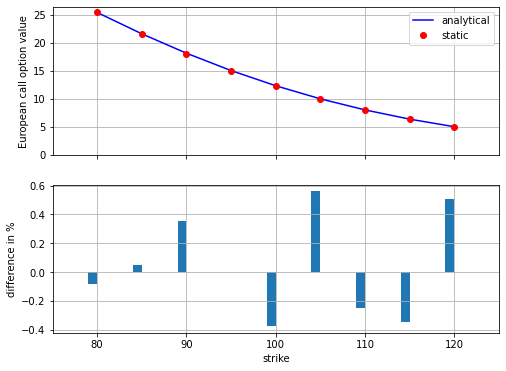

In [297]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, stat_res, 'ro', label='static')
ax1.set_ylabel('European call option value')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylim(ymin=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - stat_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)

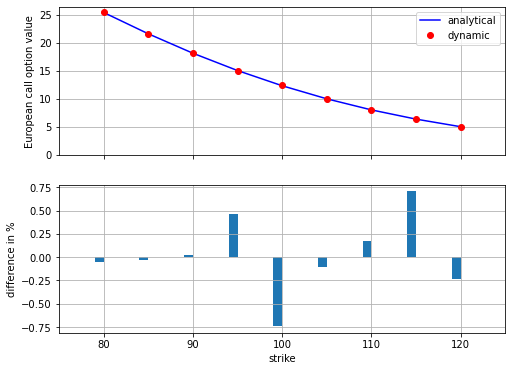

In [298]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, anal_res, 'b', label='analytical')
ax1.plot(k_list, dyna_res, 'ro', label='dynamic')
ax1.set_ylabel('European call option value')
ax1.grid(True)
ax1.legend(loc=0)
ax1.set_ylim(ymin=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (anal_res - dyna_res) / anal_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('difference in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)

## Valuation of American Options
The	valuation	of	American	options	is	more	involved	compared	to	European	options.	In
this	case,	an	optimal	stopping	problem	has	to	be	solved	to	come	up	with	a	fair	value	of	the
option.	Below Equation	formulates	the	valuation	of	an	American	option	as	such	a	problem.
The	problem	formulation	is	already	based	on	a	discrete	time	grid	for	use	with	numerical
simulation.	In	a	sense,	it	is	therefore	more	correct	to	speak	of	an	option	value	given
Bermudan	exercise.	For	the	time	interval	converging	to	zero	length,	the	value	of	the
Bermudan	option	converges	to	the	one	of	the	American	option.

*American option prices as optimal stopping problem*

$$V_{0}= \sup_{\tau \in \{0,\Delta t,2\Delta t,...,T\}}e^{rT}E_{0}^Q(h(S_{T}))$$

*Least-squares regression for American option valuation*

$$\min_{\alpha_{1,t},...,\alpha_{D,t}}\frac{1}{I}\sum_{i=1}^I (Y_{t,i}-\sum_{d=1}^D \alpha_{d,t}\cdot b_d (S_{t,i}))$$

In [299]:
#The following function implements the LSM algorithm for 
#both American call and put options
def gbm_mcs_amer(K, option='call'):
    ''' Valuation of American option in Black-Scholes-Merton
    by Monte Carlo simulation by LSM algorithm
    
    Parameters
    ==========
    K : float
        (positive) strike price of the option
    option : string
        type of the option to be valued ('call', 'put')
    
    Returns
    =======
    C0 : float
        estimated present value of European call option
    '''
    dt = T / M
    df = np.exp(-r * dt)
    # simulation of index levels
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt 
                + sigma * np.sqrt(dt) * sn[t])
    # case based calculation of payoff
    if option == 'call':
        h = np.maximum(S - K, 0)
    else:
        h = np.maximum(K - S, 0)
    # LSM algorithm
    V = np.copy(h)
    for t in range(M - 1, 0, -1):
        reg = np.polyfit(S[t], V[t + 1] * df, 7)
        C = np.polyval(reg, S[t])
        V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
    # MCS estimator
    C0 = df * 1 / I * np.sum(V[1])
    return C0

In [300]:
gbm_mcs_amer(110., option='call')

7.778933279449315

In [301]:
gbm_mcs_amer(110., option='put')

13.614023206242445

In [302]:
euro_res = []
amer_res = []
k_list = np.arange(80., 120.1, 5.)
for K in k_list:
    euro_res.append(gbm_mcs_dyna(K, 'put'))
    amer_res.append(gbm_mcs_amer(K, 'put'))
euro_res = np.array(euro_res)
amer_res = np.array(amer_res)

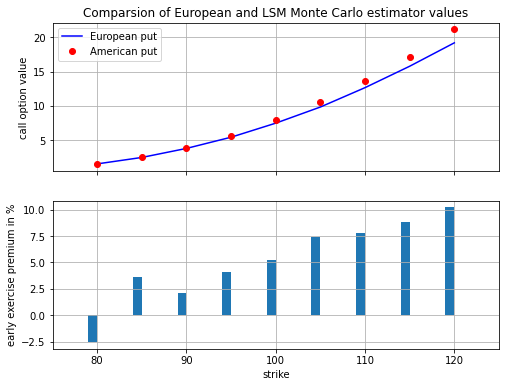

In [303]:
# The following chart shows the price difference between American and European options, 
#which is mainly caused by early exercise premium.
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 6))
ax1.plot(k_list, euro_res, 'b', label='European put')
ax1.plot(k_list, amer_res, 'ro', label='American put')
ax1.set_ylabel('call option value')
ax1.set_title('Comparsion of European and LSM Monte Carlo estimator values')
ax1.grid(True)
ax1.legend(loc=0)
wi = 1.0
ax2.bar(k_list - wi / 2, (amer_res - euro_res) / euro_res * 100, wi)
ax2.set_xlabel('strike')
ax2.set_ylabel('early exercise premium in %')
ax2.set_xlim(left=75, right=125)
ax2.grid(True)